In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# image augmentation
train_data=ImageDataGenerator(rescale=1./255,
                              shear_range=0.2,
                              rotation_range=180,
                              zoom_range=0.2,
                              horizontal_flip=True)
test_data=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train=train_data.flow_from_directory(r'/content/drive/MyDrive/IBM/flowers',
                                       target_size=(64,64),
                                       batch_size=24,
                                       class_mode="categorical")

Found 4347 images belonging to 5 classes.


In [ ]:
x_test=test_data.flow_from_directory(r'/content/drive/MyDrive/IBM/flowers',
                                       target_size=(64,64),
                                       batch_size=24,
                                       class_mode="categorical")

Found 4347 images belonging to 5 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#create model
model=Sequential()

In [ ]:
#Add layers(Convolution,Maxpooling,Flatten,Dense-(Hidden layers),Output)
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(400,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [ ]:
# compiling the model
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer="adam")

In [ ]:
model.fit(x_train,epochs=10,steps_per_epoch=len(x_train))

Epoch 1/10
182/182 [==============================] - 1246s 7s/step - loss: 1.5488 - accuracy: 0.4481
Epoch 2/10
182/182 [==============================] - 21s 115ms/step - loss: 1.0951 - accuracy: 0.5553
Epoch 3/10
182/182 [==============================] - 20s 111ms/step - loss: 1.0245 - accuracy: 0.6032
Epoch 4/10
 39/182 [=====>........................] - ETA: 16s - loss: 0.9586 - accuracy: 0.6132

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

In [ ]:
#save the model
model.save("flowers.h5")

In [ ]:
new_model=tf.keras.models.load_model('flowers.h5')

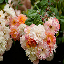

In [ ]:
testImg=image.load_img(r'/content/drive/MyDrive/IBM/flowers/rose/12240577184_b0de0e53ea_n.jpg',target_size=(64,64))
testImg

In [ ]:
#test the model
arrayImg=image.img_to_array(testImg)
arrayImg

array([[[ 73., 103.,  65.],
        [ 60.,  91.,  47.],
        [ 47.,  78.,  21.],
        ...,
        [ 72.,  99.,  58.],
        [ 82.,  96.,  45.],
        [ 71.,  79.,   2.]],

       [[ 63.,  92.,  46.],
        [ 69., 102.,  55.],
        [ 67., 102.,  60.],
        ...,
        [ 75.,  92.,  22.],
        [ 73.,  83.,  30.],
        [ 44.,  55.,   0.]],

       [[ 80., 115.,  75.],
        [ 81., 116.,  76.],
        [ 54.,  64.,  39.],
        ...,
        [ 43.,  50.,   0.],
        [ 52.,  67.,   0.],
        [ 62.,  80.,   0.]],

       ...,

       [[  4.,   0.,   0.],
        [  2.,   0.,   6.],
        [  1.,   0.,   2.],
        ...,
        [  0.,   0.,   0.],
        [  7.,  10.,   3.],
        [ 21.,  37.,   0.]],

       [[  1.,   1.,   1.],
        [  0.,   0.,   0.],
        [  1.,   1.,   1.],
        ...,
        [  0.,   0.,   0.],
        [  3.,  11.,   0.],
        [ 14.,  29.,   0.]],

       [[  0.,   0.,   0.],
        [  1.,   1.,   1.],
        [  1.,  

In [ ]:
arrayImg=np.expand_dims(arrayImg,axis=0)
predictImg=model.predict(arrayImg)
predictImg

array([[1.000000e+00, 0.000000e+00, 3.541532e-10, 0.000000e+00,
        0.000000e+00]], dtype=float32)

In [ ]:
labels=["rose","dandelion","daisy","sunflower","tulip"]
np.argmax(predictImg)

0

In [ ]:
labels[np.argmax(predictImg)]

'rose'

In [ ]:
import cv2

In [ ]:
img=cv2.imread('/content/drive/MyDrive/IBM/flowers/rose/12240577184_b0de0e53ea_n.jpg')
img

array([[[ 73, 112,  80],
        [ 70, 109,  77],
        [ 65, 104,  72],
        ...,
        [  5,  88,  80],
        [  0,  82,  73],
        [  0,  78,  66]],

       [[ 72, 110,  80],
        [ 69, 107,  77],
        [ 65, 103,  73],
        ...,
        [  2,  79,  71],
        [  0,  74,  63],
        [  0,  70,  58]],

       [[ 71, 109,  79],
        [ 70, 108,  78],
        [ 64, 105,  74],
        ...,
        [  1,  70,  60],
        [  3,  64,  54],
        [  0,  60,  49]],

       ...,

       [[  1,   1,   1],
        [  1,   1,   1],
        [  0,   0,   0],
        ...,
        [  2,  22,   9],
        [  1,  24,  10],
        [  0,  25,  11]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  3,  21,   8],
        [  0,  23,   9],
        [  0,  23,   9]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,  23,  10],
        [  1,  24,  10],
        [  0,  23,   9]]

In [ ]:
import matplotlib.pyplot as plt

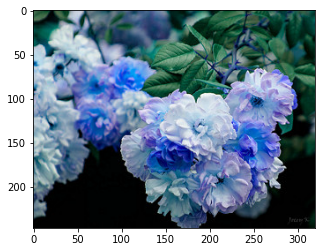

In [ ]:
plt.imshow(img)

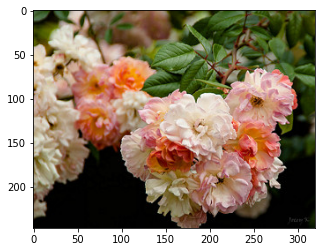

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))